# Startup-Acquisition-Status-Prediction.

### Preprocessing

In [1]:
#import necessary libraries  
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [2]:
# to display all columns
pd.set_option('display.max_columns', None)

In [3]:
company = pd.read_csv("companies.csv")

In [4]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
company.shape

(196553, 44)

##### A. Data Cleaning
1. Delete irrelevant & redundant information
2. Remove noise or unreliable data (missing values and outliers)

##### 1. Delete irrelevant and redundant information
 1. Delete 'region','city','state_code' as they provide too much of granularity.
 2. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.
 3. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
    'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
    'invested_companies' as they are irrelevant features.   
 4. Delete those which has more than 98% of null values.

In [6]:
company.drop(['region','city','state_code'], axis=1,inplace=True)
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1,inplace=True)
company.drop([ 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1,inplace=True)

In [7]:
# Since we can see only nan values so let's check how much of ros has nan values.
percent_missing = company. isnull(). sum() * 100 / len(company)
print("percentage of nan in each columns:")
percent_missing.sort_values()

percentage of nan in each columns:


status                  0.000000
relationships          34.029498
category_code          37.326828
milestones             53.346426
last_milestone_at      53.346426
first_milestone_at     53.346426
founded_at             53.586564
country_code           55.233448
lat                    57.338733
lng                    57.338733
funding_rounds         83.868473
last_funding_at        83.970227
first_funding_at       83.970227
funding_total_usd      85.818583
closed_at              98.667026
investment_rounds      98.681780
last_investment_at     98.685851
first_investment_at    98.685851
ROI                    99.630634
dtype: float64

In [8]:
# Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company.drop(['first_investment_at','last_investment_at','investment_rounds','ROI'], axis=1,inplace=True)

In [9]:
company.shape

(196553, 15)

In [10]:
company.isna().sum()

category_code          73367
status                     0
founded_at            105326
closed_at             193933
country_code          108563
first_funding_at      165046
last_funding_at       165046
funding_rounds        164846
funding_total_usd     168679
first_milestone_at    104854
last_milestone_at     104854
milestones            104854
relationships          66886
lat                   112701
lng                   112701
dtype: int64

In [11]:
# Drop missing values
company.dropna(subset=['category_code', 'status', 'founded_at', 'country_code', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships','lat', 'lng'], inplace=True)

In [12]:
company.shape

(12327, 15)

##### Outliers

<AxesSubplot:xlabel='funding_total_usd'>

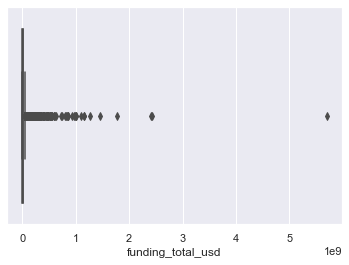

In [13]:
# 'funding_total_usd' 
sns.boxplot(x=company["funding_total_usd"])

In [14]:
# For funding_total_usd

Q1_FTU = company.funding_total_usd.quantile(0.25)
Q3_FTU = company.funding_total_usd.quantile(0.75)
Q1_FTU, Q3_FTU
IQR_FTU = Q3_FTU - Q1_FTU
print(f"IQR of funding_total_usd is: {IQR_FTU}\n")

# For funding_total_usd
lower_limit_FTU = Q1_FTU - 1.5*IQR_FTU
upper_limit_FTU = Q3_FTU + 1.5*IQR_FTU
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FTU}")
print(f"upper limit is: {upper_limit_FTU}\n")

# For funding_total_usd
funding_total_usd_outliers=company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)]
print(f"Outliers{funding_total_usd_outliers.shape}")

# For funding_total_usd
company.drop(company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)].index,inplace=True)

IQR of funding_total_usd is: 15846000.0

funding_total_usd
lower limit is: -23115000.0
upper limit is: 40269000.0

Outliers(1423, 15)


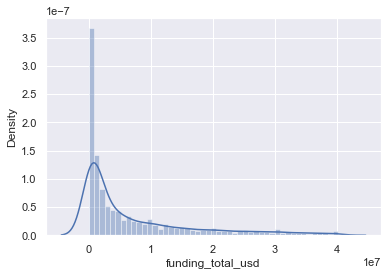

In [15]:
sns.distplot(company['funding_total_usd']) 
plt.show()

<AxesSubplot:xlabel='relationships'>

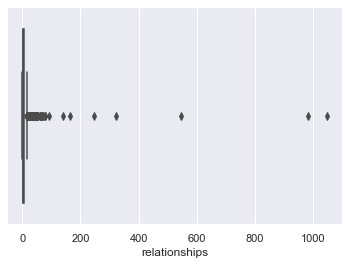

In [16]:
sns.boxplot(x=company["relationships"])

In [17]:
# For relationships 

Q1_rel = company.relationships.quantile(0.25)
Q3_rel = company.relationships.quantile(0.75)
Q1_rel, Q3_rel
IQR_rel = Q3_rel - Q1_rel
print(f"IQR of relationships is: {IQR_rel}\n")

# For relationships
lower_limit_rel = Q1_rel - 1.5*IQR_rel
upper_limit_rel = Q3_rel + 1.5*IQR_rel
print("relationships")
print(f"lower limit is: {lower_limit_rel}")
print(f"upper limit is: {upper_limit_rel}\n")

# For relationships
relationships_outliers=company[(company.relationships<lower_limit_rel)|(company.relationships>upper_limit_rel)]
print(f"Outliers{relationships_outliers.shape}")

# For relationships
company.drop(company[(company.relationships<lower_limit_rel)|(company.relationships>upper_limit_rel)].index,inplace=True)

IQR of relationships is: 6.0

relationships
lower limit is: -7.0
upper limit is: 17.0

Outliers(499, 15)


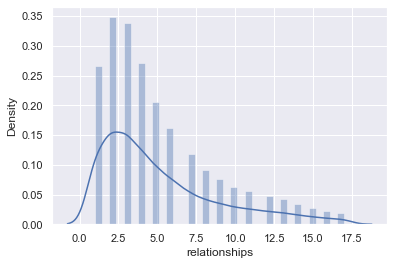

In [18]:
sns.distplot(company['relationships']) 
plt.show()

In [19]:
company.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,10405.000000,1.040500e+04,10405.000000,10405.000000,10405.000000,10405.000000
mean,1.831716,6.521776e+06,1.612206,5.123402,38.569066,-66.152293
std,1.139464,8.971708e+06,0.813090,3.764981,13.448626,63.010678
min,1.000000,2.910000e+02,1.000000,1.000000,-42.883611,-158.056896
25%,1.000000,5.000000e+05,1.000000,2.000000,37.338208,-121.886329
50%,1.000000,2.250000e+06,1.000000,4.000000,39.103118,-80.244216
75%,2.000000,9.115000e+06,2.000000,7.000000,43.653226,-3.703790
max,15.000000,4.026850e+07,9.000000,17.000000,70.919200,174.776236


In [20]:
# For founded_at
company['founded_at']=pd.to_datetime(company['founded_at'], format='%Y-%m-%d').dt.year

# closed_at
company['closed_at']=pd.to_datetime(company['closed_at'], format='%Y-%m-%d').dt.year

# first_funding_at
company['first_funding_at']=pd.to_datetime(company['first_funding_at'], format='%Y-%m-%d').dt.year

# last_funding_at
company['last_funding_at']=pd.to_datetime(company['last_funding_at'], format='%Y-%m-%d').dt.year

# first_milestone_at
company['first_milestone_at']=pd.to_datetime(company['first_milestone_at'], format='%Y-%m-%d').dt.year


# last_milestone_at
company['last_milestone_at']=pd.to_datetime(company['last_milestone_at'], format='%Y-%m-%d').dt.year

company.dtypes

category_code          object
status                 object
founded_at              int64
closed_at             float64
country_code           object
first_funding_at        int64
last_funding_at         int64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at      int64
last_milestone_at       int64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

In [21]:
# 1. category_code
print('Total number of unique categories are:',company.category_code.nunique())
company.category_code.unique()


Total number of unique categories are: 42


array(['web', 'cleantech', 'mobile', 'enterprise', 'games_video',
       'analytics', 'news', 'software', 'other', 'security',
       'advertising', 'photo_video', 'finance', 'travel', 'ecommerce',
       'transportation', 'hospitality', 'public_relations', 'biotech',
       'health', 'education', 'medical', 'network_hosting', 'nonprofit',
       'search', 'sports', 'fashion', 'messaging', 'consulting', 'music',
       'social', 'hardware', 'real_estate', 'automotive', 'pets',
       'manufacturing', 'semiconductor', 'legal', 'design', 'local',
       'nanotech', 'government'], dtype=object)

In [22]:
company.category_code.value_counts()

software            1735
web                 1204
mobile               973
enterprise           798
ecommerce            656
advertising          578
games_video          525
biotech              348
analytics            341
social               302
hardware             237
education            219
finance              199
cleantech            174
security             157
other                155
network_hosting      153
health               148
search               137
public_relations     131
messaging            114
travel               113
medical              104
fashion               92
consulting            92
semiconductor         91
news                  85
music                 84
hospitality           80
photo_video           65
real_estate           61
sports                51
manufacturing         48
nonprofit             33
automotive            29
transportation        24
design                22
legal                 21
pets                  10
nanotech               8


In [23]:
# category_encoading
category_others_index = company.category_code.value_counts()[14:].index
company['category_code'] = company['category_code'].replace(to_replace=category_others_index,value='other')

In [24]:
# Let's check if we've more than 15 columns
print('Unique no of category_code : ',company['category_code'].nunique())
company.category_code.value_counts()

Unique no of category_code :  15


other          2116
software       1735
web            1204
mobile          973
enterprise      798
ecommerce       656
advertising     578
games_video     525
biotech         348
analytics       341
social          302
hardware        237
education       219
finance         199
cleantech       174
Name: category_code, dtype: int64

In [25]:
print('Total number of unique categories are:',company.country_code.nunique())
company.country_code.unique()

Total number of unique categories are: 91


array(['USA', 'AUS', 'SWE', 'DEU', 'JPN', 'GBR', 'RUS', 'ISL', 'CAN',
       'CHE', 'ISR', 'TUR', 'FRA', 'ZAF', 'MYS', 'ESP', 'IND', 'KOR',
       'DNK', 'IRL', 'CHN', 'EST', 'PHL', 'BEL', 'PRT', 'SGP', 'NLD',
       'UKR', 'MEX', 'IDN', 'POL', 'SVK', 'EGY', 'NZL', 'NGA', 'CZE',
       'FIN', 'HRV', 'ITA', 'HUN', 'HKG', 'CYP', 'GRC', 'NPL', 'ARG',
       'BRA', 'BGR', 'CHL', 'LUX', 'ARE', 'THA', 'AUT', 'BHS', 'GEO',
       'NOR', 'PAN', 'LBN', 'BGD', 'URY', 'GTM', 'LTU', 'COL', 'TWN',
       'ANT', 'MAR', 'CRI', 'BLR', 'SVN', 'VEN', 'VNM', 'ALB', 'LVA',
       'JOR', 'PER', 'DOM', 'KEN', 'UGA', 'MMR', 'ROM', 'BHR', 'AZE',
       'PAK', 'CYM', 'UMI', 'GIB', 'CMR', 'SAU', 'GHA', 'CSS', 'FST',
       'BRB'], dtype=object)

In [26]:
country_code_others_index = company['country_code'].value_counts()[9:].index
company['country_code'] = company['country_code'].replace(to_replace=country_code_others_index,value='other')

In [27]:
print('Total number of unique countries are:',company.country_code.nunique())
company.country_code.unique()

Total number of unique countries are: 10


array(['USA', 'AUS', 'other', 'DEU', 'GBR', 'CAN', 'ISR', 'FRA', 'ESP',
       'IND'], dtype=object)

##### Create new variables¶
1. Create new feature isClosed from closed_at and status.
2. Create new feature 'active_days'

##### 1. Create new feature isClosed from closed_at and status.
 - if the value in status is 'operating' or 'ipo', Let's put 0.
 - Where as if the value is 'acquired' or 'closed', let's put 1.

In [28]:
def isClosed(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 0
    else:
        return 1
company['isClosed'] = company.apply(lambda rw: isClosed(rw),axis=1)
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,NaN,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0
13,web,acquired,2007,NaN,USA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1
20,cleantech,operating,2003,NaN,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0
26,mobile,operating,2003,NaN,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0
45,enterprise,operating,2004,NaN,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,closed,2008,2012.0,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1
196537,social,operating,2011,NaN,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0
196540,games_video,closed,2006,2012.0,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1
196549,other,operating,2007,NaN,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0


#####  Replacing the values in closed_at column
if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.

Where as if the value is 'acquired' or 'closed', let's put 0.

In [29]:
company['closed_at']=(np.where((company['status']=='operating')|(company['status']=='ipo'),2021,company['closed_at']))

In [30]:
company = company.dropna()

In [31]:
company.shape

(9324, 16)

In [32]:
company.duplicated().sum()

3

In [33]:
# Let's delete all the duplicate values
company.drop_duplicates(inplace=True)

In [34]:
company.isClosed.value_counts()

0    8722
1     599
Name: isClosed, dtype: int64

##### 2. Create active_days column from founded_at and closed_at column

Active days = founded_at - closed_at

In [35]:
company['active_days'] = 365*(company.closed_at - company.founded_at)

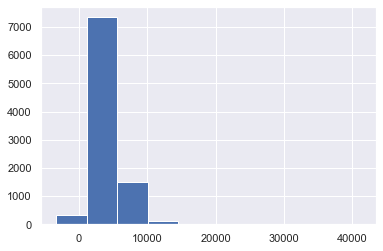

In [36]:
plt.hist(company['active_days'], bins=10)
plt.show()

In [37]:
company.drop(columns=['status','closed_at'], inplace = True)

In [38]:
company.to_csv('final_company', index=False)

### EDA

In [39]:
company.describe()

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
count,9321.000000,9321.000000,9321.000000,9321.000000,9.321000e+03,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000,9321.000000
mean,2007.967707,2010.369596,2011.314666,1.821693,6.118446e+06,2010.393949,2011.068018,1.564639,4.986804,38.451869,-63.883144,0.064263,4537.888639
std,5.474789,2.365156,2.029823,1.147850,8.782050e+06,2.911082,2.725316,0.774133,3.709942,13.927531,64.110249,0.245235,2141.460773
min,1908.000000,1994.000000,1994.000000,1.000000,2.910000e+02,1976.000000,1976.000000,1.000000,1.000000,-42.883611,-158.056896,0.000000,-3285.000000
25%,2007.000000,2009.000000,2011.000000,1.000000,4.055290e+05,2010.000000,2010.000000,1.000000,2.000000,37.229573,-120.740139,0.000000,3650.000000
50%,2010.000000,2011.000000,2012.000000,1.000000,2.000000e+06,2011.000000,2012.000000,1.000000,4.000000,39.569600,-79.931051,0.000000,4015.000000
75%,2011.000000,2012.000000,2013.000000,2.000000,8.100000e+06,2012.000000,2013.000000,2.000000,7.000000,43.653226,-1.404351,0.000000,5110.000000
max,2014.000000,2013.000000,2013.000000,15.000000,4.026850e+07,2014.000000,2014.000000,9.000000,17.000000,70.919200,174.776236,1.000000,41245.000000


0    8722
1     599
Name: isClosed, dtype: int64


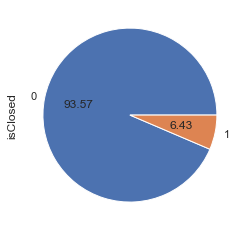

In [40]:
print(company.isClosed.value_counts())
company['isClosed'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

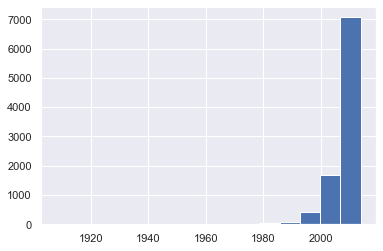

In [41]:
plt.hist(company['founded_at'], bins=15)
plt.show()

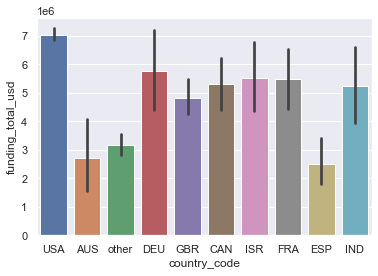

In [42]:
sns.barplot(company['country_code'], company['funding_total_usd'])
plt.show()

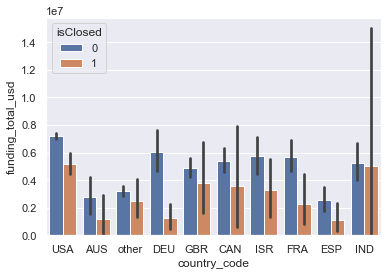

In [43]:
sns.barplot(company['country_code'], company['funding_total_usd'], hue = company["isClosed"])
plt.show()

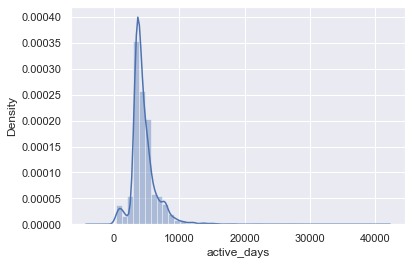

In [44]:
sns.distplot(company['active_days']) 
plt.show()

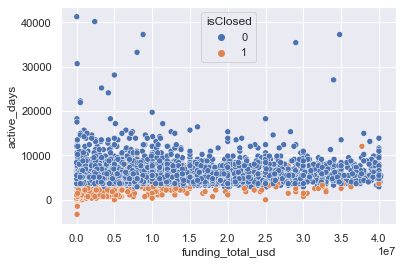

In [45]:
sns.scatterplot(company["funding_total_usd"], company["active_days"], hue=company["isClosed"])
plt.show()

<AxesSubplot:xlabel='lng', ylabel='lat'>

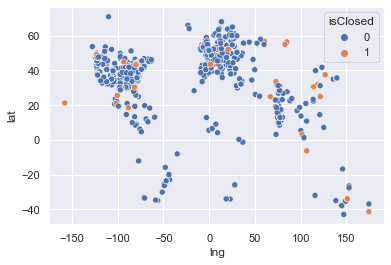

In [46]:
sns.scatterplot(company["lng"], company["lat"], hue=company["isClosed"])

In [47]:
company

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
20,cleantech,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
26,mobile,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
45,enterprise,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
48,web,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,mobile,2008,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0
196537,social,2011,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0
196540,games_video,2006,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0
196549,other,2007,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0


# ---------------------------------------------------------------------------------------------------------------

In [48]:
#import necessary libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [49]:
company = pd.read_csv('final_company')

In [50]:
company.sample(50)

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
5304,enterprise,2007,USA,2011,2011,3.0,14450000.0,2011,2013,2.0,11.0,42.277528,-71.346809,0,5110.0
1584,mobile,2003,ISR,2005,2011,5.0,18522536.0,2008,2008,1.0,2.0,32.089746,34.946979,0,6570.0
3416,other,2007,USA,2013,2013,1.0,25000.0,2013,2013,1.0,2.0,37.386052,-122.083851,0,5110.0
7,analytics,2008,USA,2012,2012,1.0,3100000.0,2009,2012,3.0,5.0,37.368830,-122.036350,0,4745.0
3891,software,2005,USA,2006,2006,1.0,3000000.0,2006,2006,1.0,2.0,33.568461,-117.726298,0,5840.0
8659,games_video,2009,USA,2011,2012,3.0,9425000.0,1993,2011,2.0,4.0,30.267153,-97.743061,0,4380.0
8547,cleantech,1999,USA,2013,2013,2.0,6268669.0,2008,2008,1.0,2.0,47.760950,-122.205588,0,8030.0
6332,other,2010,USA,2012,2013,3.0,875000.0,2010,2013,2.0,9.0,37.368830,-122.036350,0,4015.0
8407,software,2002,USA,2011,2012,2.0,5709625.0,2012,2012,1.0,13.0,37.662431,-121.874679,0,6935.0
4883,web,2009,USA,2013,2013,1.0,10000000.0,2009,2013,2.0,2.0,29.760427,-95.369803,0,4380.0


##### Corelation and Multicolinarity

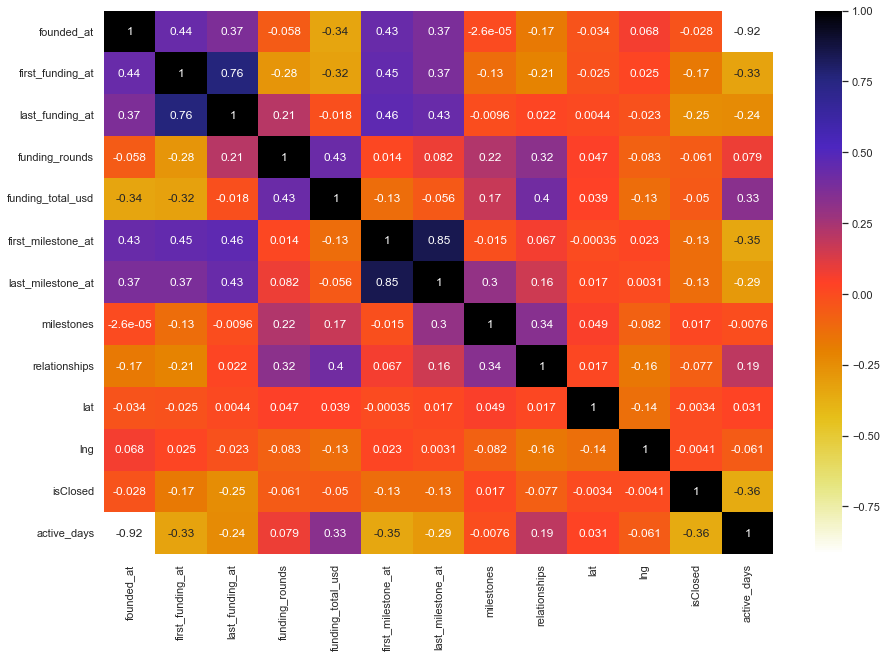

In [51]:
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = company.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [52]:
cor["isClosed"].sort_values(ascending=False)

isClosed              1.000000
milestones            0.016832
lat                  -0.003354
lng                  -0.004084
founded_at           -0.028183
funding_total_usd    -0.050217
funding_rounds       -0.061061
relationships        -0.077139
last_milestone_at    -0.125180
first_milestone_at   -0.130754
first_funding_at     -0.174515
last_funding_at      -0.246476
active_days          -0.363778
Name: isClosed, dtype: float64

In [53]:
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
vif_df = company.drop(["isClosed",'category_code','country_code'], axis=1)

In [55]:
calc_vif(vif_df)

,variables,VIF
0,founded_at,8.765222e+05
1,first_funding_at,3.693328e+06
2,last_funding_at,4.365378e+06
3,funding_rounds,7.375689e+00
4,funding_total_usd,2.298635e+00
5,first_milestone_at,2.479594e+06
6,last_milestone_at,2.847642e+06
7,milestones,8.597062e+00
8,relationships,4.000309e+00
9,lat,8.827071e+00


In [56]:
X = company.drop(["isClosed",'category_code','country_code','last_milestone_at','first_funding_at','founded_at','last_funding_at','first_milestone_at'], axis=1)

In [57]:
calc_vif(X)

,variables,VIF
0,funding_rounds,4.242621
1,funding_total_usd,2.105807
2,milestones,5.074618
3,relationships,3.830639
4,lat,5.775304
5,lng,2.081721
6,active_days,4.761166


In [58]:
# company = company.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

##### one hot encoading

In [59]:
company

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
1,cleantech,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
2,mobile,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
3,enterprise,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
4,web,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,mobile,2008,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0
9317,social,2011,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0
9318,games_video,2006,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0
9319,other,2007,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0


In [60]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.category_code, prefix='category', drop_first=True)
dummies

,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9317,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9318,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9319,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [61]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web
0,web,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,cleantech,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,mobile,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,enterprise,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,web,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,mobile,2008,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9317,social,2011,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9318,games_video,2006,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9319,other,2007,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['category_code'], axis=1,inplace=True)

In [63]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.country_code, prefix='country', drop_first=True)
dummies

,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9316,0,0,0,0,0,0,0,1,0
9317,1,0,0,0,0,0,0,0,0
9318,0,0,0,0,0,0,0,1,0
9319,0,0,0,0,0,0,0,1,0


In [64]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,2005,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2003,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2003,AUS,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2004,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2006,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,2008,USA,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9317,2011,CAN,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
9318,2006,USA,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9319,2007,USA,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['country_code'], axis=1,inplace=True)

In [66]:
company

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_biotech,category_cleantech,category_ecommerce,category_education,category_enterprise,category_finance,category_games_video,category_hardware,category_mobile,category_other,category_social,category_software,category_web,country_CAN,country_DEU,country_ESP,country_FRA,country_GBR,country_IND,country_ISR,country_USA,country_other
0,2005,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2003,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2003,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2004,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2006,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,2008,2008,2008,1.0,130000.0,2008,2009,2.0,3.0,37.774929,-122.419415,1,1460.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9317,2011,2011,2011,1.0,500000.0,2011,2011,1.0,2.0,28.805267,-97.003598,0,3650.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
9318,2006,2008,2009,2.0,1100000.0,2005,2008,2.0,4.0,37.774929,-122.419415,1,2190.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9319,2007,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329,0,5110.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [67]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts()[0]/y_train.value_counts()[1])
print(y_test.value_counts()[0]/y_test.value_counts()[1])

(7456, 35)
(1865, 35)
14.565762004175365
14.541666666666666


##### Oversampling 

In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [71]:
print(X_train.shape)
print(y_test.shape)

(13954, 35)
(1865,)


In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts()[0]/y_train.value_counts()[1])
print(y_test.value_counts()[0]/y_test.value_counts()[1])

(13954, 35)
(1865, 35)
1.0
14.541666666666666


In [73]:
y_train.value_counts()

0    6977
1    6977
Name: isClosed, dtype: int64

### Model Building
1. XG Boost
2. Random Forest
3. Logistic Regression
4. SVM

##### XG Boost

In [74]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [75]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb_clf_predict = xgb_clf.predict(X_train)
print(confusion_matrix(y_train,xgb_clf_predict))
print(accuracy_score(y_train,xgb_clf_predict))
print(classification_report(y_train,xgb_clf_predict))

[[6977    0]
 [   0 6977]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6977
           1       1.00      1.00      1.00      6977

    accuracy                           1.00     13954
   macro avg       1.00      1.00      1.00     13954
weighted avg       1.00      1.00      1.00     13954



In [76]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb_clf_predict = xgb_clf.predict(X_test)
print(confusion_matrix(y_test,xgb_clf_predict))
print(accuracy_score(y_test,xgb_clf_predict))
print(classification_report(y_test,xgb_clf_predict))

[[1744    1]
 [   1  119]]
0.9989276139410188
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1745
           1       0.99      0.99      0.99       120

    accuracy                           1.00      1865
   macro avg       1.00      1.00      1.00      1865
weighted avg       1.00      1.00      1.00      1865



#### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_clf_predict = rf_clf.predict(X_train)
print(confusion_matrix(y_train,rf_clf_predict))
print(accuracy_score(y_train,rf_clf_predict))
print(classification_report(y_train,rf_clf_predict))

[[6977    0]
 [   0 6977]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6977
           1       1.00      1.00      1.00      6977

    accuracy                           1.00     13954
   macro avg       1.00      1.00      1.00     13954
weighted avg       1.00      1.00      1.00     13954



In [79]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_clf_predict = rf_clf.predict(X_test)
print(confusion_matrix(y_test,rf_clf_predict))
print(accuracy_score(y_test,rf_clf_predict))
print(classification_report(y_test,rf_clf_predict))

[[1745    0]
 [   6  114]]
0.9967828418230563
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1745
           1       1.00      0.95      0.97       120

    accuracy                           1.00      1865
   macro avg       1.00      0.97      0.99      1865
weighted avg       1.00      1.00      1.00      1865



#### LogisticRegression

In [80]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [81]:
# testing on Traing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_reg_predict = log_reg.predict(X_train)
print(confusion_matrix(y_train,log_reg_predict))
print(accuracy_score(y_train,log_reg_predict))
print(classification_report(y_train,log_reg_predict))

[[6799  178]
 [ 479 6498]]
0.9529167263866991
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6977
           1       0.97      0.93      0.95      6977

    accuracy                           0.95     13954
   macro avg       0.95      0.95      0.95     13954
weighted avg       0.95      0.95      0.95     13954



In [82]:
# predicting on test data set
log_reg_predict = log_reg.predict(X_test)
print(confusion_matrix(y_test, log_reg_predict))
print(accuracy_score(y_test, log_reg_predict))
print(classification_report(y_test, log_reg_predict))

[[1697   48]
 [  10  110]]
0.9689008042895443
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1745
           1       0.70      0.92      0.79       120

    accuracy                           0.97      1865
   macro avg       0.85      0.94      0.89      1865
weighted avg       0.97      0.97      0.97      1865



#### SVM

In [83]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [84]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_train)
print(confusion_matrix(y_train,svc_predict))
print(accuracy_score(y_train,svc_predict))
print(classification_report(y_train,svc_predict))

[[3462 3515]
 [2603 4374]]
0.5615594094883187
              precision    recall  f1-score   support

           0       0.57      0.50      0.53      6977
           1       0.55      0.63      0.59      6977

    accuracy                           0.56     13954
   macro avg       0.56      0.56      0.56     13954
weighted avg       0.56      0.56      0.56     13954



In [85]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_test)
print(confusion_matrix(y_test,svc_predict))
print(accuracy_score(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

[[856 889]
 [ 38  82]]
0.5029490616621984
              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1745
           1       0.08      0.68      0.15       120

    accuracy                           0.50      1865
   macro avg       0.52      0.59      0.40      1865
weighted avg       0.90      0.50      0.62      1865



_______________________________________________________________________________________________________________________________

In [86]:
company = pd.read_csv('final_company')

In [87]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

##### one hot encoading and Scaling

In [89]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [90]:
ohe    = OneHotEncoder(sparse=False)
scaler = StandardScaler()

In [91]:
columns_to_encode = ['category_code', 'country_code']
columns_to_scale = ['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'active_days']

In [92]:
scaled_columns  = scaler.fit_transform(X_train[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(X_train[columns_to_encode])

In [93]:
X_train = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [94]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-2.136622,-2.261203,-3.077574,-0.717982,-0.184384,-0.473955,-0.755747,-0.732799,0.272260,0.277495,-0.118672,2.102641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.192657,-0.575714,-0.149182,0.164087,-0.172972,-0.129697,-0.021947,0.559785,-0.537245,0.157791,-0.164564,-0.079376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.013481,-0.154341,-0.149182,1.046156,0.863156,0.214561,0.711853,1.852369,1.891268,-0.055692,-0.918463,0.088471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.909358,1.109776,0.826949,-0.717982,-0.663695,0.903076,0.711853,0.559785,-0.537245,-5.122391,2.792053,-0.750766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.730183,0.688404,0.338883,-0.717982,-0.689943,0.558819,0.344953,-0.732799,-0.807080,1.245122,1.183579,-0.582919,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7451,0.371832,-0.154341,-0.637247,-0.717982,-0.697817,-0.129697,-0.388847,-0.732799,-1.076914,0.163891,-0.281597,-0.247224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7452,0.730183,0.688404,0.338883,-0.717982,-0.616717,0.214561,-0.021947,-0.732799,-1.076914,1.510589,1.269229,-0.582919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7453,-0.344869,-1.418459,-2.101443,-0.717982,-0.259948,-1.162470,-0.021947,3.144953,0.811929,0.749574,1.024492,0.424166,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7454,0.013481,-0.997086,-1.613378,-0.717982,-0.583810,-0.818212,-1.122647,-0.732799,0.002425,0.749574,1.024492,-1.422157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [95]:
scaled_columns  = scaler.transform(X_test[columns_to_scale]) 
encoded_columns =    ohe.transform(X_test[columns_to_encode])

In [96]:
X_test = np.concatenate([scaled_columns, encoded_columns], axis=1)

##### Handling Imbalanced Dataset

In [97]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#### LogisticRegression

In [98]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [99]:
# testing on Traing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_reg_predict = log_reg.predict(X_train)
print(confusion_matrix(y_train,log_reg_predict))
print(accuracy_score(y_train,log_reg_predict))
print(classification_report(y_train,log_reg_predict))

[[6977    0]
 [   0 6977]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6977
           1       1.00      1.00      1.00      6977

    accuracy                           1.00     13954
   macro avg       1.00      1.00      1.00     13954
weighted avg       1.00      1.00      1.00     13954



In [100]:
# predicting on test data set
log_reg_predict = log_reg.predict(X_test)
print(confusion_matrix(y_test, log_reg_predict))
print(accuracy_score(y_test, log_reg_predict))
print(classification_report(y_test, log_reg_predict))

[[1745    0]
 [   0  120]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1745
           1       1.00      1.00      1.00       120

    accuracy                           1.00      1865
   macro avg       1.00      1.00      1.00      1865
weighted avg       1.00      1.00      1.00      1865



#### Support Vector Classification

In [101]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [102]:
#testing on training set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_train)
print(confusion_matrix(y_train,svc_predict))
print(accuracy_score(y_train,svc_predict))
print(classification_report(y_train,svc_predict))

[[6977    0]
 [   0 6977]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6977
           1       1.00      1.00      1.00      6977

    accuracy                           1.00     13954
   macro avg       1.00      1.00      1.00     13954
weighted avg       1.00      1.00      1.00     13954



In [103]:
#testing on tesing set
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_predict = svc.predict(X_test)
print(confusion_matrix(y_test,svc_predict))
print(accuracy_score(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

[[1745    0]
 [   1  119]]
0.9994638069705094
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1745
           1       1.00      0.99      1.00       120

    accuracy                           1.00      1865
   macro avg       1.00      1.00      1.00      1865
weighted avg       1.00      1.00      1.00      1865



## ---------------------------------------------------------------------------------------------------------------------------------

#### Lets create Pipeline

pipe1 - without scaling data

pipe2 - with scaling data

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [105]:
pd.set_option('display.max_columns', None)

In [106]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [107]:
company = pd.read_csv('final_company')

In [108]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [110]:
X_train

,category_code,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,active_days
4621,advertising,2004,USA,2010,2011,2.0,21000000.0,2011,2011,2.0,15.0,40.712775,-74.005973,6205.0
6716,other,2002,USA,2005,2006,2.0,30000000.0,2004,2004,1.0,2.0,30.267153,-97.743061,6935.0
5606,biotech,2003,USA,2009,2011,3.0,5385000.0,2008,2008,1.0,2.0,37.678074,-97.239236,6570.0
5858,ecommerce,2009,USA,2011,2012,2.0,9000000.0,2010,2011,2.0,5.0,45.523062,-122.676481,4380.0
154,web,2008,other,2012,2012,3.0,1000000.0,2013,2013,2.0,11.0,59.329324,18.068581,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,web,2011,USA,2011,2012,2.0,465000.0,2013,2013,1.0,6.0,36.162664,-86.781602,3650.0
8448,ecommerce,2010,IND,2011,2013,3.0,25000000.0,2012,2012,2.0,3.0,19.075984,72.877656,4015.0
1891,software,2009,USA,2008,2008,1.0,8000000.0,2013,2013,1.0,14.0,37.322998,-122.032182,4380.0
1721,mobile,2012,USA,2012,2012,1.0,40000.0,2012,2013,2.0,3.0,25.761680,-80.191790,3285.0


In [111]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe_category',OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'),[0]),
    ('ohe_country',OneHotEncoder(sparse=False,handle_unknown='ignore', drop='first'),[2])
],remainder='passthrough')

In [112]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_category',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [0]),
                                ('ohe_country',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [2])])

In [113]:
first_step = trf1.fit_transform(X_train)

In [114]:
pd.DataFrame(trf1.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2004.0,2010.0,2011.0,2.0,21000000.0,2011.0,2011.0,2.0,15.0,40.712775,-74.005973,6205.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2002.0,2005.0,2006.0,2.0,30000000.0,2004.0,2004.0,1.0,2.0,30.267153,-97.743061,6935.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2003.0,2009.0,2011.0,3.0,5385000.0,2008.0,2008.0,1.0,2.0,37.678074,-97.239236,6570.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2009.0,2011.0,2012.0,2.0,9000000.0,2010.0,2011.0,2.0,5.0,45.523062,-122.676481,4380.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,2012.0,2012.0,3.0,1000000.0,2013.0,2013.0,2.0,11.0,59.329324,18.068581,4745.0


In [115]:
trf3 = xgb.XGBClassifier()

In [116]:
trf4= RandomForestClassifier()

In [117]:
trf5 = LogisticRegression()

In [118]:
trf6 = SVC()

In [119]:
from imblearn.pipeline import Pipeline
pipe1 = Pipeline([
    ('OHE',trf1),
    ('smote', SMOTE(random_state=11)),
#     ('XG BOOST',trf3)
#     ('Random Forest', trf4)
#     ('Logistic Regression', trf5)
    ('SVM', trf6)
])

In [120]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_category',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0]),
                                                 ('ohe_country',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [2])])),
                ('smote', SMOTE(random_state=11)), ('SVM', SVC())])

In [121]:
y_pred = pipe1.predict(X_train)

In [122]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[3796 3181]
 [ 188  291]]
0.5481491416309013
              precision    recall  f1-score   support

           0       0.95      0.54      0.69      6977
           1       0.08      0.61      0.15       479

    accuracy                           0.55      7456
   macro avg       0.52      0.58      0.42      7456
weighted avg       0.90      0.55      0.66      7456



In [123]:
y_pred = pipe1.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[920 825]
 [ 54  66]]
0.528686327077748
              precision    recall  f1-score   support

           0       0.94      0.53      0.68      1745
           1       0.07      0.55      0.13       120

    accuracy                           0.53      1865
   macro avg       0.51      0.54      0.40      1865
weighted avg       0.89      0.53      0.64      1865



#### pipe2

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [126]:
company = pd.read_csv('final_company')

In [127]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True, 
                                                    test_size=0.2)

In [129]:
# X_train = X_train.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

In [130]:
# X_test = X_test.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

In [131]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe_category',OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'),[0]),
    ('ohe_country',OneHotEncoder(sparse=False,handle_unknown='ignore', drop='first'),[2])
],remainder='passthrough')

In [132]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_category',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [0]),
                                ('ohe_country',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [2])])

In [133]:
first_step = trf1.fit_transform(X_train)

In [134]:
pd.DataFrame(trf1.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2011.0,2011.0,2011.0,1.0,100000.0,2011.0,2011.0,1.0,1.0,35.085334,-106.605553,3650.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010.0,2010.0,2010.0,1.0,248812.0,2010.0,2010.0,1.0,1.0,35.689487,139.691706,4015.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2004.0,2008.0,2008.0,1.0,7000000.0,2009.0,2012.0,2.0,10.0,32.715738,-117.161084,6205.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2007.0,2012.0,2012.0,1.0,500000.0,2007.0,2010.0,3.0,6.0,37.774929,-122.419415,5110.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2013.0,2013.0,2013.0,1.0,25000.0,2013.0,2013.0,1.0,3.0,37.774929,-122.419415,2920.0


In [135]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(23,35))
],remainder='passthrough')

In [136]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 slice(23, 35, None))])

In [137]:
second_step = trf2.fit_transform(first_step)

In [138]:
pd.DataFrame(trf2.fit_transform(first_step)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.564019,0.263401,-0.161669,-0.714952,-0.687552,0.211401,-0.019767,-0.729164,-1.071669,-0.249614,-0.667885,-0.421093,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.377728,-0.158584,-0.654879,-0.714952,-0.670678,-0.131625,-0.384583,-0.729164,-1.071669,-0.205662,3.175558,-0.247784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.740016,-1.002552,-1.641298,-0.714952,0.094858,-0.474652,0.345048,0.567437,1.343797,-0.422002,-0.832603,0.792071,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.181144,0.685385,0.331541,-0.714952,-0.642195,-1.160705,-0.384583,1.864037,0.270257,-0.053946,-0.914659,0.272144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.936600,1.107369,0.824750,-0.714952,-0.696057,0.897454,0.709864,-0.729164,-0.534898,-0.053946,-0.914659,-0.767711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [139]:
from imblearn.pipeline import Pipeline
pipe2 = Pipeline([
    ('OHE',trf1),
    ('smote', SMOTE(random_state=11)),
    ('scaling', trf2),
    ('Logistic Regression',trf5),
#     ('SVM',trf6)
])

In [140]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_category',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0]),
                                                 ('ohe_country',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [2])])),
                ('smote', SMOTE(random_state=11)),
                ('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(23, 35, None))])),
                ('Logistic Regression', LogisticRegression())])

In [141]:
y_pred = pipe2.predict(X_train)

In [142]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[6977    0]
 [   0  479]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6977
           1       1.00      1.00      1.00       479

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [143]:
y_pred = pipe2.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1745    0]
 [   0  120]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1745
           1       1.00      1.00      1.00       120

    accuracy                           1.00      1865
   macro avg       1.00      1.00      1.00      1865
weighted avg       1.00      1.00      1.00      1865



#### ......................................................................................Thank You................................................................................................................